In [1]:
import jenn

# Tutorial 1: One-Dimensional Sinusoid

### Synthetic Data

In a first step, let's define the test function we will be working with, taken to be a simple sinusoidal function:

In [2]:
sample = jenn.synthetic.Sinusoid.sample

Next, let's define the domain over which we will collect synthetic training data:

In [3]:
lb, ub = (-3.14, 3.14)

We will now generate some synthetic data that will be used to train our GENN model later on:

In [4]:
x_train, y_train, dydx_train = sample(m_lhs=0, m_levels=4, lb=lb, ub=ub)

We also generate some synthetic data that will be used to test the accuracy of the trained model:

In [5]:
x_test, y_test, dydx_test = sample(m_lhs=30, m_levels=0, lb=lb, ub=ub)

### Training

Training can be done in one line of code. In this case, we'll train both a regular neural networks (nn):

In [6]:
nn = jenn.model.NeuralNet(layer_sizes=[1, 12, 1]).fit(x_train, y_train, lambd=0.1)

elapsed time: 0.047 s


and also a gradient-enhanced neural net (genn) for comparison: 

In [7]:
genn = jenn.model.NeuralNet(layer_sizes=[1, 12, 1]).fit(x_train, y_train, dydx_train, lambd=0.1)

elapsed time: 0.048 s


### Visualization

With only four data points, a near-perfect fit is obtained using gradient-enhancement, whereas a regular neural net fails to capture the response:   

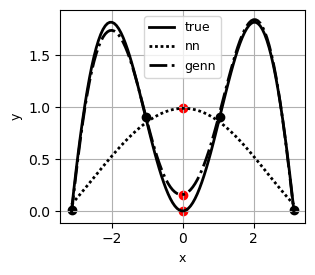

In [8]:
jenn.utils.plot.sensitivity_profiles(
    f=[jenn.synthetic.Sinusoid.evaluate, nn.predict, genn.predict], 
    x_min=x_train.min(), 
    x_max=x_train.max(), 
    x_true=x_train, 
    y_true=y_train, 
    resolution=100, 
    legend=['true', 'nn', 'genn'], 
    xlabels=['x'], 
    ylabels=['y'],
)

### Save / Reload Model

Model parameters are serialized. They can be easily saved as `json` and reloaded later. Say `genn` is the old model to be saved: 

In [9]:
old_model = genn
old_model.parameters.save('parameters.json')
new_model = jenn.model.NeuralNet(layer_sizes=[1, 3, 1])  # layer_sizes will be overwritten upon reload
new_model.parameters.load('parameters.json')
assert (new_model.predict(x_test) == old_model.predict(x_test)).all()